<h1 style="text-align: center;">Infosys Springboard - Group 2</h1>


<h3 style="text-align: right;">
    Done by:<br>
  Midhru Jayan J<br>
  Harsini A B<br>
  Abinaya K<br>
  Kashish Sharma<br>
</h3>


## DATA PREPROCESSING


In [105]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [106]:
# Loading the Tesla stock dataset into a DataFrame
Tesla = pd.read_csv('/content/tesla.csv')

In [107]:
# Displaying the Dataset
Tesla

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [108]:
# Checking the number of rows and columns in the dataset
Tesla.shape

(1692, 7)

In [109]:
# Listing all column names in the dataset
Tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [110]:
# Displaying first few default rows of the Tesla Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [111]:
# Rounding all float columns to 4 decimal places for consistency
float_columns = Tesla.select_dtypes(include=['float64']).columns
Tesla[float_columns] = Tesla[float_columns].round(4)

In [112]:
# Displaying the Tesla Dataset
Tesla

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.00,25.00,17.54,23.89,18766300,23.89
1,6/30/2010,25.79,30.42,23.30,23.83,17187100,23.83
2,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
3,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
4,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11
...,...,...,...,...,...,...,...
1687,3/13/2017,244.82,246.85,242.78,246.17,3010700,246.17
1688,3/14/2017,246.11,258.12,246.02,258.00,7575500,258.00
1689,3/15/2017,257.00,261.00,254.27,255.73,4816600,255.73
1690,3/16/2017,262.40,265.75,259.06,262.05,7100400,262.05


In [113]:
# Checking for missing values in each column of the dataset
Tesla.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [114]:
# Checking for duplicate rows in the dataset
Tesla.duplicated().sum()

0

## Outlier Detection

In [115]:
# Displaying the dataset's structure, data types, and non-null counts
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


<Axes: ylabel='Open'>

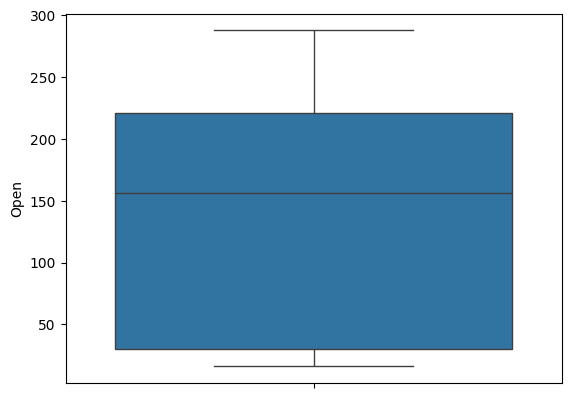

In [116]:
# Creating a box plot to visualize the distribution of the 'Open' prices
sns.boxplot(Tesla['Open'])

<Axes: ylabel='High'>

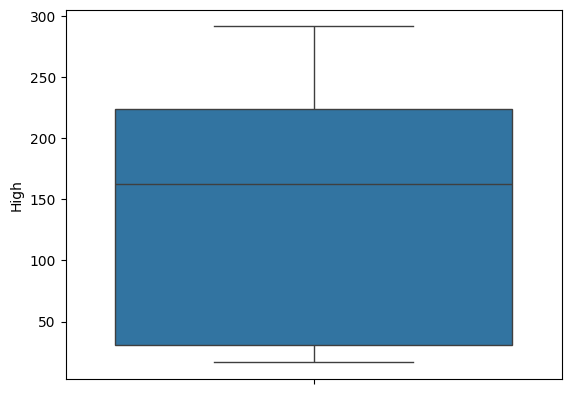

In [117]:
# Creating a box plot to visualize the distribution of the 'High' prices
sns.boxplot(Tesla['High'])

<Axes: ylabel='Close'>

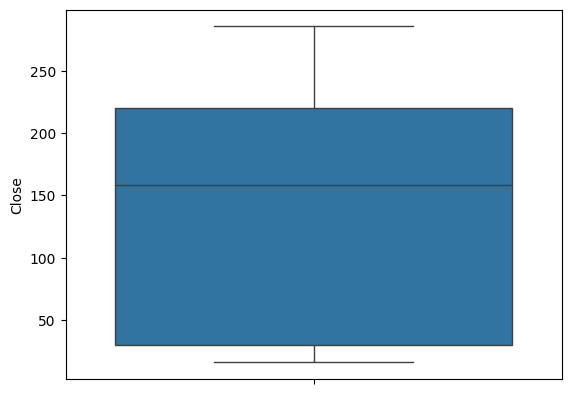

In [118]:
# Creating a box plot to visualize the distribution of the 'Close' prices
sns.boxplot(Tesla['Close'])

<Axes: ylabel='Adj Close'>

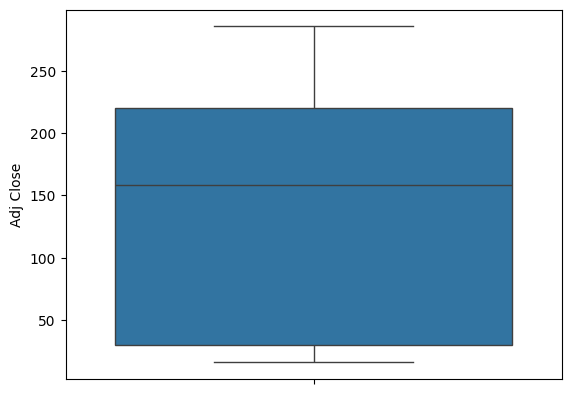

In [119]:
# Creating a box plot to visualize the distribution of the 'Adj CLose', Adjusted Closing prices
sns.boxplot(Tesla['Adj Close'])

<Axes: ylabel='Volume'>

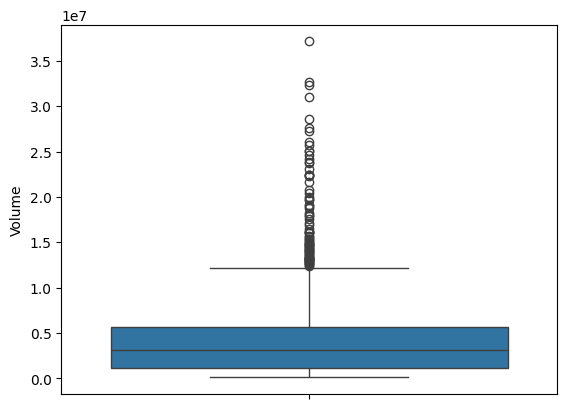

In [120]:
# Creating a box plot to visualize the distribution of the 'Volume' prices
sns.boxplot(Tesla['Volume'])

In [121]:
#Maximum Outliers are seen in Volume. So, we will be performing Outlier Detection for 'Volume' using the IQR Method
# Displaying summary statistics for the 'Volume' column
Tesla['Volume'].describe()

,Volume
count,1.692000e+03
mean,4.270741e+06
std,4.295971e+06
min,1.185000e+05
25%,1.194350e+06
50%,3.180700e+06
75%,5.662100e+06
max,3.716390e+07


In [122]:
# Calculating the Interquartile Range (IQR) and determining the lower and upper bounds for detecting outliers in the 'Volume' column
Q1 = Tesla['Volume'].quantile(0.25)
Q3 = Tesla['Volume'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [123]:
# (Tesla['Volume'] >= upper_bound).sum()
(Tesla['Volume'] >= upper_bound).sum()

80

In [124]:
# Filtering the dataset to remove outliers in the 'Volume' column based on the calculated bounds
Tesla = Tesla[(Tesla['Volume'] >= lower_bound) & (Tesla['Volume'] <= upper_bound)]

In [125]:
# Resetting the index of the dataset and displaying the first few rows after the reset
Tesla = Tesla.reset_index(drop=True)
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
1,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
2,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11
3,7/7/2010,16.40,16.63,14.98,15.80,6921700,15.80
4,7/8/2010,16.14,17.52,15.57,17.46,7711400,17.46


In [126]:
Tesla.shape

(1612, 7)

In [127]:
# Checking for missing values in the dataset, calculating their percentage, and displaying a summary of columns with missing data
missing_values = Tesla.isnull().sum()
missing_percentages = (missing_values / len(Tesla)) * 100
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage of Total": missing_percentages
}).query("`Missing Values` > 0").sort_values(by="Percentage of Total", ascending=False)
display(missing_summary)

,Missing Values,Percentage of Total


In [128]:
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


## EDA

In [129]:
# Displaying first few columns of the Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
1,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
2,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11
3,7/7/2010,16.40,16.63,14.98,15.80,6921700,15.80
4,7/8/2010,16.14,17.52,15.57,17.46,7711400,17.46


In [130]:
# Checking for sum missing values in the 'Date' column
Tesla['Date'].isna().sum()

0

In [131]:
# Checking for missing values in the 'Date' column
Tesla['Date'].isna()

,Date
0,False
1,False
2,False
3,False
4,False
...,...
1607,False
1608,False
1609,False
1610,False


<Axes: >

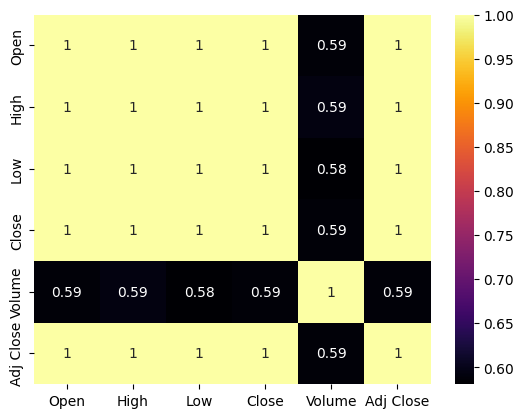

In [132]:
# Creating a heatmap to visualize the correlation between different stock price columns
sns.heatmap(Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr(), annot=True, cmap='inferno')

In [133]:
# Converting the 'Date' column to datetime format, invalid dates are set to NaT (Not a Time)
Tesla['Date'] = pd.to_datetime(Tesla['Date'], errors='coerce')

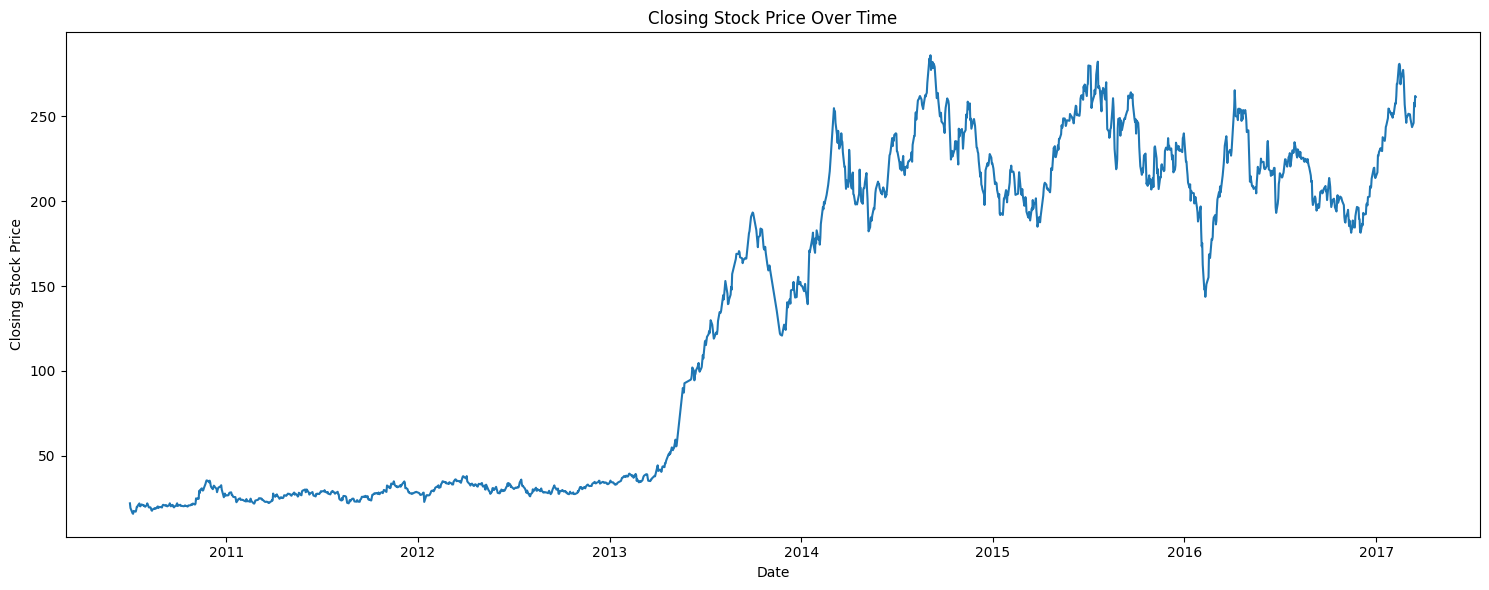

In [134]:
# Plotting the closing stock price over time with a line plot to visualize trends in Tesla's stock price
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Close', data= Tesla)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.tight_layout()

Text(0, 0.5, 'Frequency')

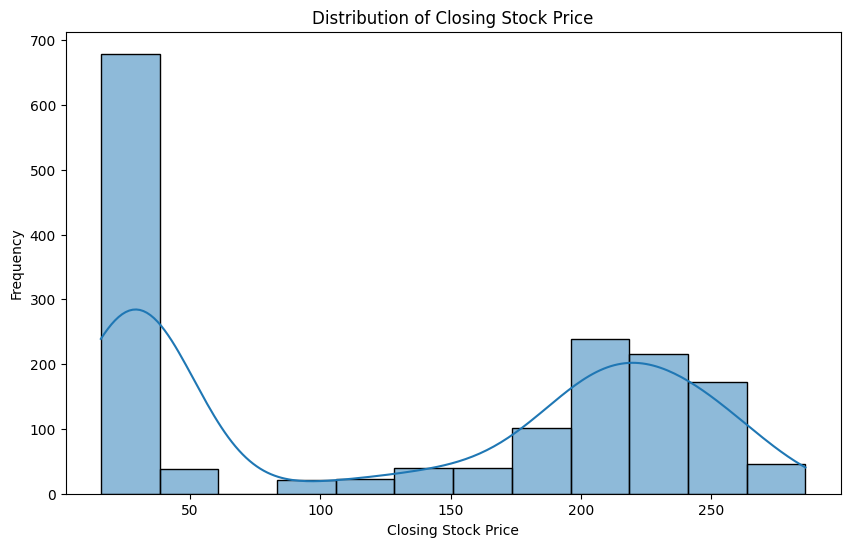

In [135]:
# Creating a histogram with a KDE to visualize the distribution of closing stock prices
plt.figure(figsize=(10, 6))
sns.histplot(Tesla['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Daily Return')

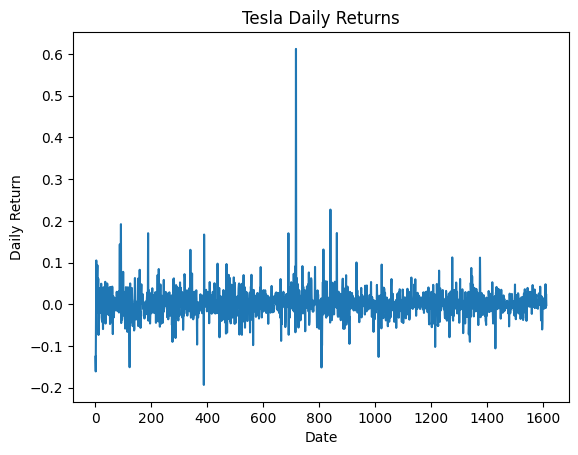

In [136]:
# Plotting Tesla's daily returns over time to visualize fluctuations in stock price change
daily_returns = Tesla['Close'].pct_change()
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

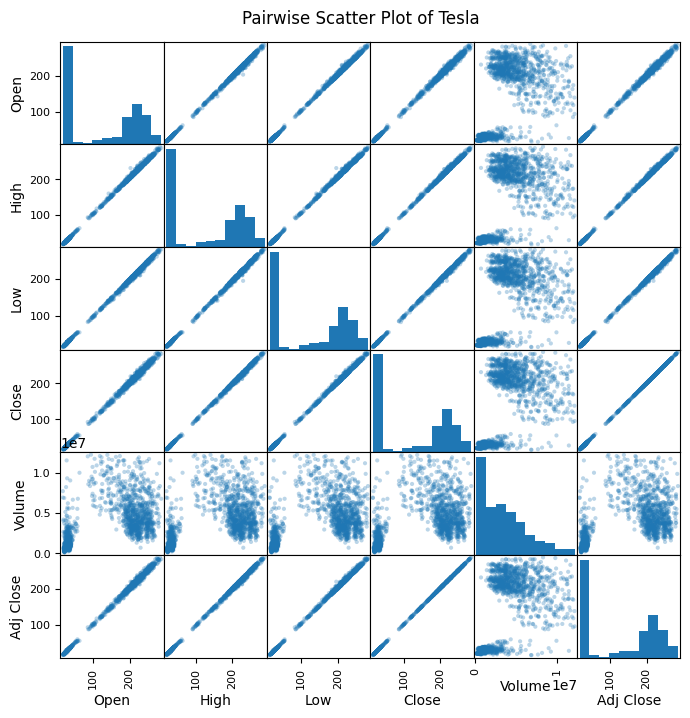

In [137]:
# Creating a scatter matrix to visualize pairwise relationships between stock price columns for the specified company
def scatter_matrix(stock, company):
    pd.plotting.scatter_matrix(stock, figsize=(8,8), alpha=0.3)
    plt.suptitle(f'Pairwise Scatter Plot of {company}', x=0.5, y=0.92)
    plt.show()
company_name = 'Tesla'
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
scatter_matrix(Tesla[columns], company_name)

In [138]:
# Importing the AutoCorrelation Function (ACF) plot function to analyze time series dependencies
from statsmodels.graphics.tsaplots import plot_acf

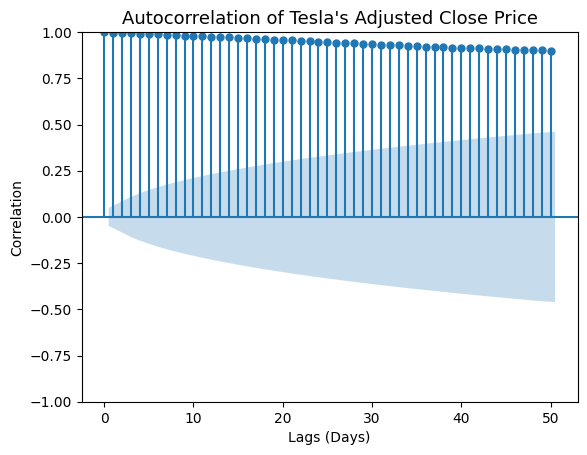

In [139]:
# Plotting the autocorrelation of Tesla's adjusted close price to analyze the correlation of prices over different lags
def autocorrelation(Tesla):
    plot_acf(Tesla['Adj Close'], lags=50)
    plt.title(f'Autocorrelation of Tesla\'s Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags (Days)', fontsize=10)
    plt.ylabel('Correlation', fontsize=10)
    plt.show()
autocorrelation(Tesla)

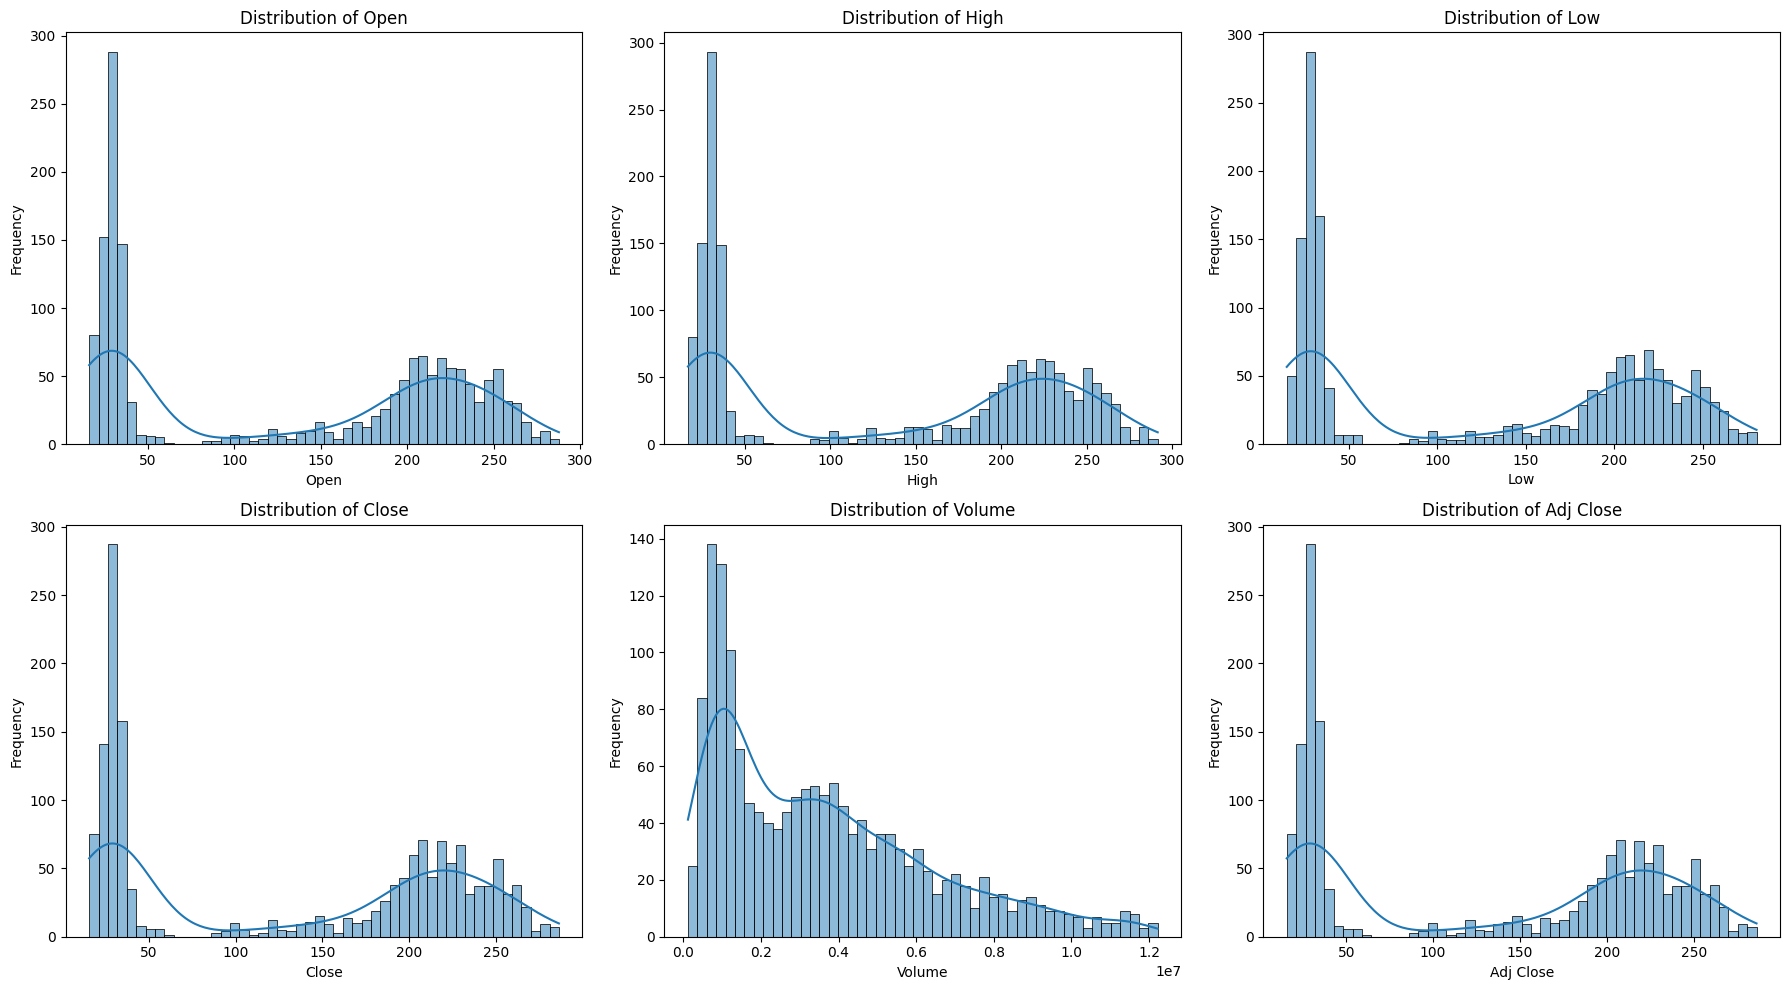

In [140]:
# Creating histograms with KDE for each selected column to visualize the distribution of stock prices and trading volume
columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    sns.histplot(Tesla[col], bins=50, kde=True, ax=ax[row, col_idx])
    ax[row, col_idx].set_title(f'Distribution of {col}')
    ax[row, col_idx].set_xlabel(col)
    ax[row, col_idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Transformation

In [141]:
# Checking the number of missing values in each column of the Tesla dataset
Tesla.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [142]:
# Importing StandardScaler to standardize the features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [143]:
# Initializing the StandardScaler to scale the features of the dataset
scaler = StandardScaler()

In [144]:
# Defining the list of numerical columns to be standardized in the dataset
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [145]:
# Applying standard scaling to the numerical columns to normalize the data for better model performance
Tesla[numerical_columns] = scaler.fit_transform(Tesla[numerical_columns])

In [146]:
# Displaying the Dataset
Tesla

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-07-01,-1.109828,-1.107147,-1.152729,-1.141416,1.656233,-1.141416
1,2010-07-02,-1.130764,-1.136248,-1.169303,-1.170297,0.555988,-1.170297
2,2010-07-06,-1.162168,-1.168240,-1.199899,-1.202632,1.173147,-1.202632
3,2010-07-07,-1.199852,-1.203017,-1.208930,-1.205876,1.192729,-1.205876
4,2010-07-08,-1.202574,-1.193833,-1.202662,-1.188505,1.474920,-1.188505
...,...,...,...,...,...,...,...
1607,2017-03-13,1.191228,1.172796,1.211190,1.204774,-0.204822,1.204774
1608,2017-03-14,1.204732,1.289100,1.245611,1.328566,1.426357,1.328566
1609,2017-03-15,1.318727,1.318821,1.333258,1.304812,0.440496,1.304812
1610,2017-03-16,1.375254,1.367840,1.384147,1.370946,1.256586,1.370946


In [147]:
# Importing matplotlib for data visualization and enabling inline plotting for Jupyter notebooks
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Histograms of Numerical Features')

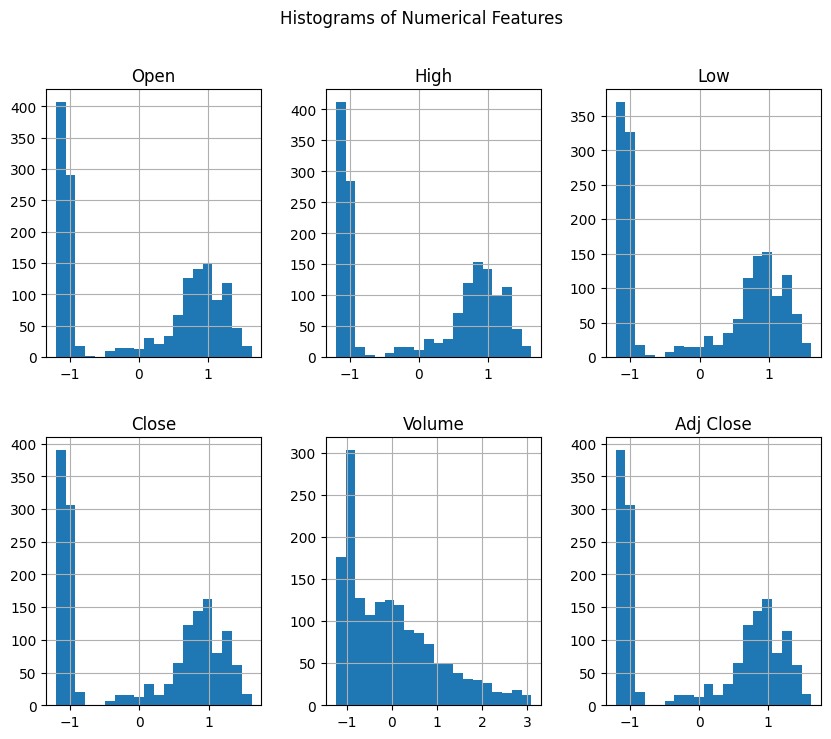

In [148]:
# Plotting histograms for numerical features in the dataset to visualize their distributions
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns].hist(bins=20, figsize=(10, 8), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')

# MinMax Scaling

In [149]:
# Importing MinMaxScaler to scale features to a specific range, typically between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [150]:
# Applying Min-Max scaling to the numerical columns to scale them between 0 and 1
min_max = MinMaxScaler()
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns] = min_max.fit_transform(Tesla[numerical_columns])

In [151]:
# Displaying first few rows of the Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-07-01,0.032630,0.033808,0.019931,0.022795,0.669098,0.022795
1,2010-07-02,0.025264,0.023545,0.014053,0.012581,0.414768,0.012581
2,2010-07-06,0.014216,0.012264,0.003202,0.001147,0.557429,0.001147
3,2010-07-07,0.000958,0.000000,0.000000,0.000000,0.561955,0.000000
4,2010-07-08,0.000000,0.003239,0.002223,0.006143,0.627186,0.006143


In [152]:
# Scaling the numerical columns using Min-Max normalization to transform values between 0 and 1
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns] = min_max.fit_transform(Tesla[numerical_columns])

Text(0.5, 0.98, 'Histograms of MinMax Scaled Numerical Features')

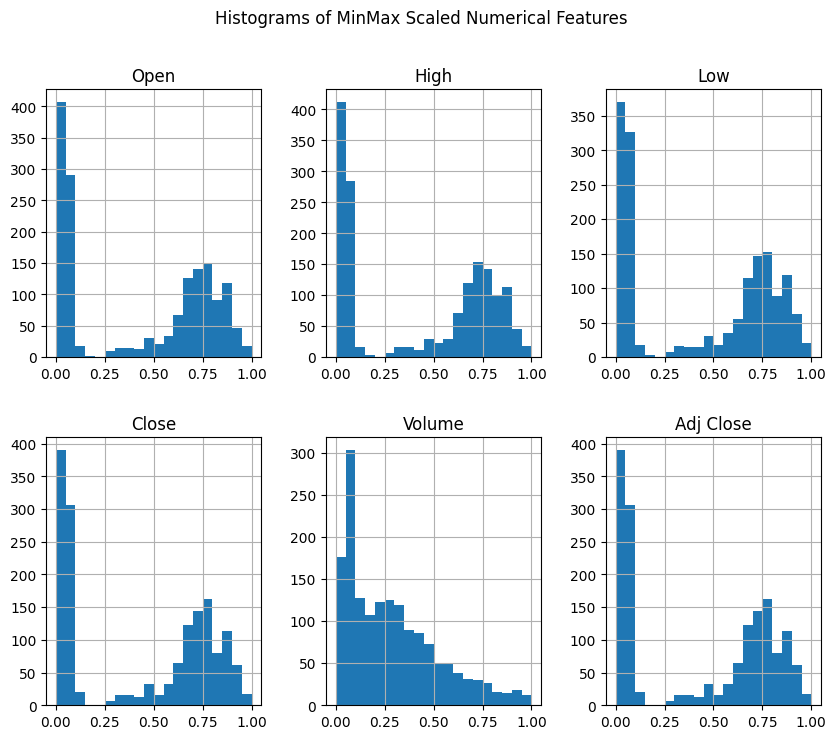

In [153]:
# Plotting histograms of the Min-Max scaled numerical features to visualize their distributions after scaling
Tesla[numerical_columns].hist(bins=20, figsize=(10, 8), layout=(2, 3))
plt.suptitle('Histograms of MinMax Scaled Numerical Features')

#Robust Scalar

In [154]:
# Importing RobustScaler to scale features using the median and interquartile range, making it less sensitive to outliers
from sklearn.preprocessing import RobustScaler

In [155]:
# Initializing the RobustScaler to scale features using the median and interquartile range
robust_scaler = RobustScaler()

In [156]:
# Applying RobustScaler to the numerical columns to scale them based on the median and interquartile range
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Tesla[numerical_columns] = robust_scaler.fit_transform(Tesla[numerical_columns])

In [157]:
# Displaying the first few rows of Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-07-01,-0.679783,-0.677816,-0.691405,-0.691872,1.281024,-0.691872
1,2010-07-02,-0.690228,-0.692317,-0.699654,-0.706324,0.522612,-0.706324
2,2010-07-06,-0.705895,-0.708257,-0.714882,-0.722505,0.948027,-0.722505
3,2010-07-07,-0.724695,-0.725585,-0.719377,-0.724128,0.961525,-0.724128
4,2010-07-08,-0.726053,-0.721009,-0.716257,-0.715436,1.156042,-0.715436


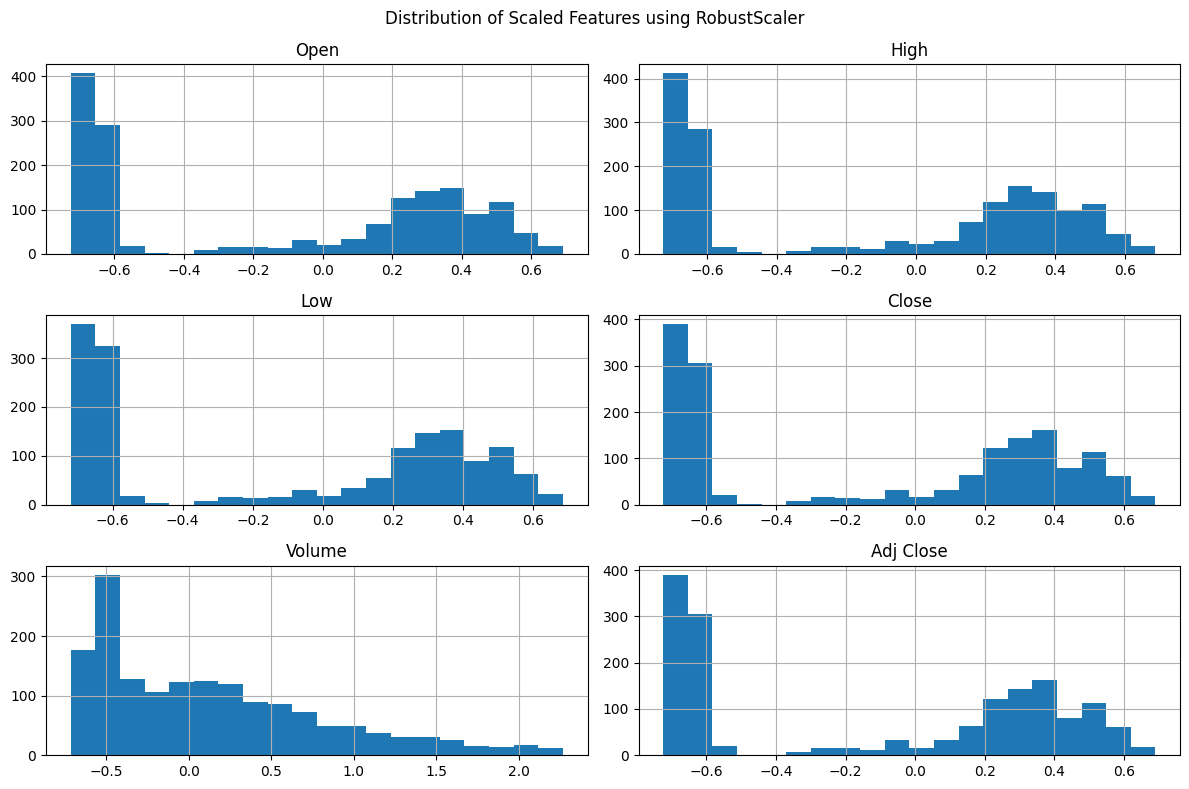

In [158]:
# Plotting histograms of the features after scaling with RobustScaler to visualize their distributions
Tesla[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Scaled Features using RobustScaler')
plt.tight_layout()

#Gaussian Transformation

In [159]:
# Importing PowerTransformer to apply power transformation for making data more Gaussian-like
from sklearn.preprocessing import PowerTransformer

In [160]:
# Initializing the PowerTransformer to apply power transformation to the dataset for normalization
power_transformer = PowerTransformer()

In [161]:
# Applying PowerTransformer to the numerical columns to normalize the data and make it more Gaussian-like
Tesla[numerical_columns] = power_transformer.fit_transform(Tesla[numerical_columns])

In [162]:
# Displaying the first few rows of Dataset
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296


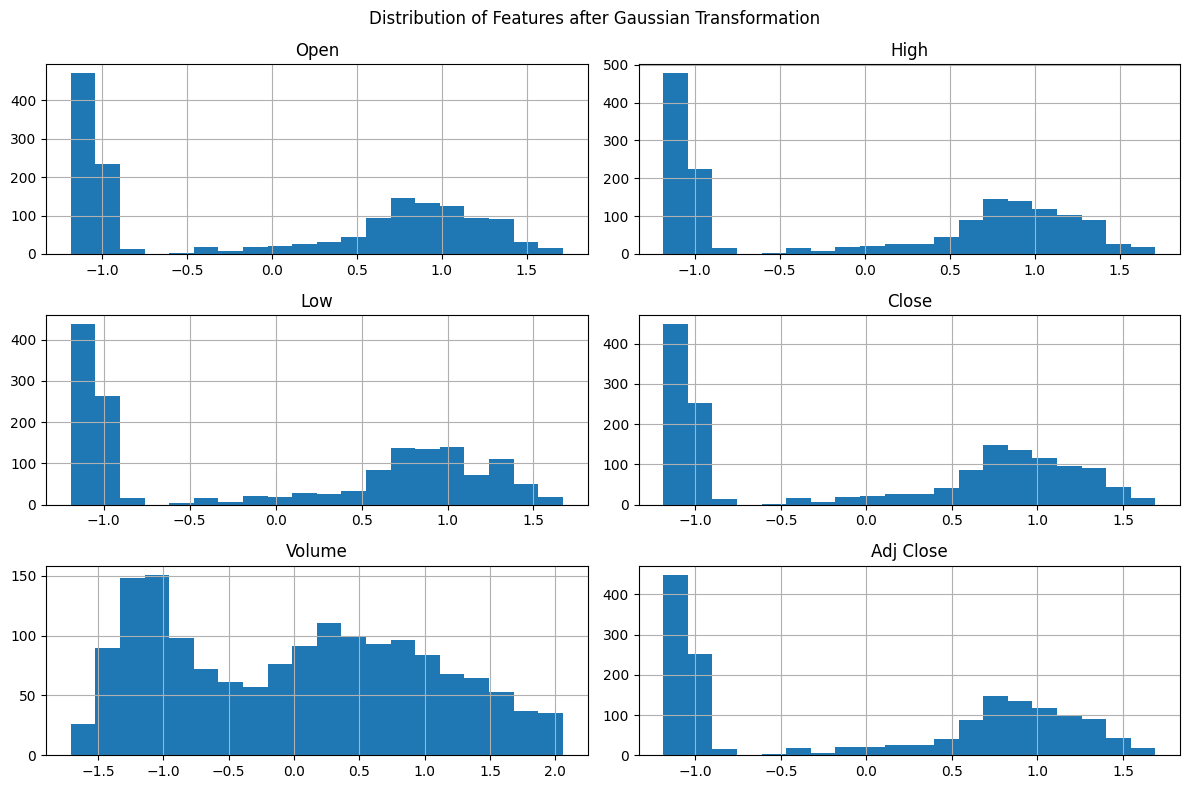

In [163]:
# Plotting histograms of the features after applying the PowerTransformer for Gaussian-like distribution
Tesla[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Features after Gaussian Transformation')
plt.tight_layout()

In [164]:
# Importing the scipy.stats library for statistical functions and tests
import scipy.stats as stats

Text(0.5, 1.0, 'Probability Plot for Tesla Features after Gaussian Transformation')

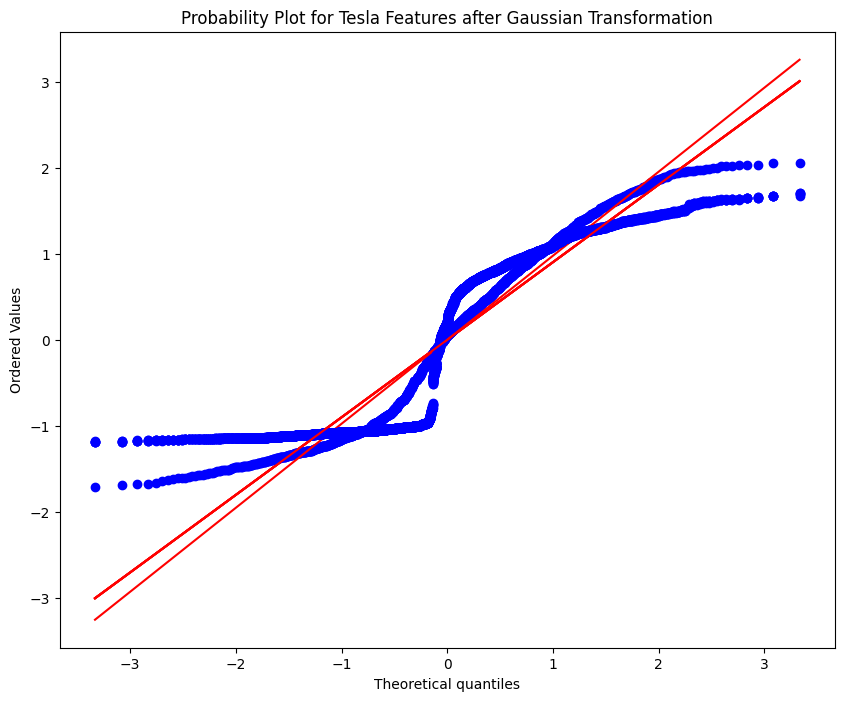

In [165]:
# Creating probability plots for each numerical feature to assess if they follow a normal distribution after transformation
plt.figure(figsize=(10, 8))
for col in numerical_columns:
    stats.probplot(Tesla[col], dist="norm", plot=plt)
plt.title('Probability Plot for Tesla Features after Gaussian Transformation')

#Feature Engineering

In [166]:
# Creating a copy of the Tesla dataset for feature transformation to avoid modifying the original dataset
Tesla = Tesla.copy()

In [167]:
# Applying log transformation to the 'Close' column to reduce skewness and create a 'Log_Close' feature
Tesla['Log_Close'] = np.log1p(Tesla['Close'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [168]:
# Converting the 'Date' column to datetime format for easier manipulation and analysis of time-related data
Tesla['Date'] = pd.to_datetime(Tesla['Date'])

In [169]:
# Extracting the hour, day, and weekday from the 'Date' column to create new time-related features
Tesla['Hour'] = Tesla['Date'].dt.hour
Tesla['Day'] = Tesla['Date'].dt.day
Tesla['Weekday'] = Tesla['Date'].dt.weekday

In [170]:
# Extracting the month, quarter, and year from the 'Date' column to create additional time-related features
Tesla['Month'] = Tesla['Date'].dt.month
Tesla['Quarter'] = Tesla['Date'].dt.quarter
Tesla['Year'] = Tesla['Date'].dt.year

In [171]:
# Creating categorical bins for hours of the day and encoding them into dummy variables to represent different times of day as features
Tesla['Hour_Bin'] = pd.cut(Tesla['Hour'], bins=[0, 6, 12, 18, 24], labels=['LateNight', 'Morning', 'Afternoon', 'Evening'])
Tesla = pd.get_dummies(Tesla, columns=['Hour_Bin'], drop_first=True)

In [172]:
# Resetting the index of the dataset after transformations and displaying the first few rows of the updated dataset
Tesla = Tesla.reset_index(drop=True)
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Log_Close,Hour,Day,Weekday,Month,Quarter,Year,Hour_Bin_Morning,Hour_Bin_Afternoon,Hour_Bin_Evening
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,NaN,0,1,3,7,3,2010,False,False,False
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,NaN,0,2,4,7,3,2010,False,False,False
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,NaN,0,6,1,7,3,2010,False,False,False
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,NaN,0,7,2,7,3,2010,False,False,False
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,NaN,0,8,3,7,3,2010,False,False,False


In [173]:
# Importing PolynomialFeatures to generate polynomial features and PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [174]:
# Defining the selected features to be used for further analysis or modeling, focusing on stock price and trading volume columns
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [175]:
# Generating polynomial features of degree 2 for the selected columns to capture interactions and higher-order relationships between them
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(Tesla[selected_features])

In [176]:
# Creating a DataFrame from the generated polynomial features and naming the columns according to the feature names generated by PolynomialFeatures
poly_feature_names = poly.get_feature_names_out(selected_features)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [177]:
# Concatenating the polynomial features to the original Tesla dataset to include them as additional features for analysis or modeling
Tesla = pd.concat([Tesla, poly_df], axis=1)

In [178]:
# Applying PCA (Principal Component Analysis) to reduce the dimensionality of the polynomial features, retaining 10 components for further analysis
pca = PCA(n_components=10)
pca_components = pca.fit_transform(poly_features)

In [179]:
# Adding the principal components as new features to the Tesla dataset, naming them 'PCA_Component_1', 'PCA_Component_2', etc. for each principal component
for i in range(pca_components.shape[1]):
    Tesla[f'PCA_Component_{i+1}'] = pca_components[:, i]

In [180]:
# Setting the environment variable 'OMP_NUM_THREADS' to limit the number of threads used by OpenMP (for parallel processing) to 7
import os
os.environ['OMP_NUM_THREADS'] = '7'

In [181]:
# Importing KMeans for clustering, IsolationForest for anomaly detection, and LocalOutlierFactor for identifying outliers in the dataset
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [182]:
# Selecting relevant features for clustering and filling any missing values with 0 to ensure the dataset is ready for clustering analysis
clustering_data = Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Close']].fillna(0)

In [183]:
# Scaling the selected clustering features using StandardScaler to standardize the data, ensuring each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

In [184]:
# Performing KMeans clustering with 5 clusters on the scaled data and assigning the cluster labels to the Tesla dataset as a new 'Cluster' column
kmeans = KMeans(n_clusters=5, random_state=42, algorithm='elkan')
cluster_labels = kmeans.fit_predict(clustering_scaled)
Tesla['Cluster'] = cluster_labels

In [185]:
# Using Isolation Forest for outlier detection, with a contamination rate of 1%, and assigning the outlier scores (1 for inliers and -1 for outliers) to a new 'Iso_Outlier' column in the Tesla dataset
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_scores_iso = iso.fit_predict(clustering_scaled)
Tesla['Iso_Outlier'] = outlier_scores_iso

In [186]:
# Applying Local Outlier Factor (LOF) for outlier detection with 20 neighbors and a contamination rate of 1%, and assigning the outlier scores (1 for inliers and -1 for outliers) to a new 'LOF_Outlier' column in the Tesla dataset
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_scores_lof = lof.fit_predict(clustering_scaled)
Tesla['LOF_Outlier'] = outlier_scores_lof

In [187]:
# Displaying Dataset to check progress
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Log_Close,Hour,Day,...,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,Cluster,Iso_Outlier,LOF_Outlier
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,NaN,0,1,...,4.358847,-0.112018,-0.023735,0.009511,0.000424,0.056515,-0.042287,4,1,-1
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,NaN,0,2,...,2.520061,0.650944,-0.042187,0.014615,0.004062,0.055106,-0.033270,0,1,1
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,NaN,0,6,...,3.775157,0.254427,-0.038903,0.003645,0.006293,0.066530,-0.024400,4,1,1
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,NaN,0,7,...,3.896972,0.246555,-0.002451,-0.024474,-0.005468,0.010006,0.021026,4,-1,1
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,NaN,0,8,...,4.352972,0.035072,0.020097,-0.025020,-0.009942,-0.024827,0.022167,4,-1,-1


In [188]:
# Importing Keras and its layers module, along with TensorFlow's layers for building and training neural network models.
import keras
from keras import layers
from tensorflow.keras import layers

In [189]:
# Prepare Tesla stock data by selecting relevant columns and removing missing values
ae_data = Tesla[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Close']].dropna()

In [190]:
# Scale the data to have zero mean and unit variance for better model performance
scaler = StandardScaler()
X = ae_data.values
X_scaled_ae = scaler.fit_transform(X)

In [191]:
# Define the dimensions for autoencoder architecture (input size and encoded representation size)
input_dim = X_scaled_ae.shape[1]
encoding_dim = 8

In [192]:
# Create the input layer for the autoencoder with the specified input dimension
input_layer = layers.Input(shape=(input_dim,))

In [193]:
# Create encoder part with two dense layers to compress the data
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

In [194]:
# Create decoder part with two dense layers to reconstruct the original data
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

In [195]:
# Build and train the autoencoder model with MSE loss function
autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
encoder = keras.Model(inputs=input_layer, outputs=encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled_ae, X_scaled_ae, epochs=10, batch_size=256, shuffle=True, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0823
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0228 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9618 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9556 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9666  
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9732 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9584 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9587 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8987 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8995 


In [196]:
# Using the encoder model to predict and encode the scaled input data (X_scaled_ae) into a lower-dimensional representation using the autoencoder
X_encoded = encoder.predict(X_scaled_ae)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [197]:
# Creating a DataFrame with the encoded features generated by the autoencoder, naming the columns as 'AE_Feature_1', 'AE_Feature_2', etc., based on the encoding dimension and retaining the original index from the data
encoded_cols = [f'AE_Feature_{i+1}' for i in range(encoding_dim)]
encoded_df = pd.DataFrame(X_encoded, index=ae_data.index, columns=encoded_cols)

In [198]:
# Adding the encoded features from the autoencoder (encoded_df) to the Tesla dataset by joining them, and displaying the first few rows of the updated dataset
Tesla = Tesla.join(encoded_df)
Tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Log_Close,Hour,Day,...,Iso_Outlier,LOF_Outlier,AE_Feature_1,AE_Feature_2,AE_Feature_3,AE_Feature_4,AE_Feature_5,AE_Feature_6,AE_Feature_7,AE_Feature_8
0,2010-07-01,-1.099935,-1.097001,-1.140501,-1.129205,1.468280,-1.129205,NaN,0,1,...,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-07-02,-1.119098,-1.123471,-1.155782,-1.155648,0.785544,-1.155648,NaN,0,2,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-07-06,-1.147797,-1.152511,-1.183957,-1.185200,1.204288,-1.185200,NaN,0,6,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-07-07,-1.182164,-1.184012,-1.192263,-1.188161,1.215908,-1.188161,NaN,0,7,...,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-08,-1.184643,-1.175699,-1.186498,-1.172296,1.374387,-1.172296,NaN,0,8,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# Building and training an autoencoder model to extract features and adding the newly generated encoded features to the Tesla dataset
from tensorflow.keras import layers

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = keras.Model(inputs=input_layer, outputs=decoded)
encoder = keras.Model(inputs=input_layer, outputs=encoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_scaled_ae, X_scaled_ae, epochs=10, batch_size=256, shuffle=True, verbose=1)
X_encoded = encoder.predict(X_scaled_ae)

# Add AE features to the dataset
encoded_cols = [f'AE_Feature_{i+1}' for i in range(encoding_dim)]
encoded_df = pd.DataFrame(X_encoded, index=ae_data.index, columns=encoded_cols)
Tesla = Tesla.join(encoded_df, rsuffix='_new', how='left')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0675
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9800 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9137 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8504 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8487 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7752 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7334 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6665 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5867 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5426 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [200]:
Tesla = Tesla.reset_index(drop=True)
hour_group = Tesla.groupby(['Day', 'Hour'])['Close'].agg(['mean', 'std', 'count']).reset_index()
# Reset the index of hour_group and flatten the MultiIndex columns
hour_group.columns = ['_'.join(col).strip() if col[1] else col[0] for col in hour_group.columns.values]

# Rename the aggregated columns
hour_group = hour_group.rename(columns={'Close_mean':'Hour_Mean_Close', 'Close_std':'Hour_Std_Close', 'Close_count':'Hour_Count'})

# Specify suffixes to avoid conflicts
Tesla = Tesla.merge(hour_group, on=['Day', 'Hour'], how='left', suffixes=('', '_new'))
# Now you can safely rename or drop the '_new' columns if needed

print("Final Data Shape:", Tesla.shape)
print(Tesla.head())

Final Data Shape: (1612, 72)
        Date      Open      High       Low     Close    Volume  Adj Close  \
0 2010-07-01 -1.099935 -1.097001 -1.140501 -1.129205  1.468280  -1.129205   
1 2010-07-02 -1.119098 -1.123471 -1.155782 -1.155648  0.785544  -1.155648   
2 2010-07-06 -1.147797 -1.152511 -1.183957 -1.185200  1.204288  -1.185200   
3 2010-07-07 -1.182164 -1.184012 -1.192263 -1.188161  1.215908  -1.188161   
4 2010-07-08 -1.184643 -1.175699 -1.186498 -1.172296  1.374387  -1.172296   

   Log_Close  Hour  Day  ...  AE_Feature_5_new  AE_Feature_6_new  \
0        NaN     0    1  ...               NaN               NaN   
1        NaN     0    2  ...               NaN               NaN   
2        NaN     0    6  ...               NaN               NaN   
3        NaN     0    7  ...               NaN               NaN   
4        NaN     0    8  ...               NaN               NaN   

   AE_Feature_7_new  AE_Feature_8_new  Hour_Mean_Close  Hour_Std_Close  \
0               NaN      

<ipython-input-200-3f7ae7523571>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  hour_group = Tesla.groupby(['Day', 'Hour'])['Close'].agg(['mean', 'std', 'count']).reset_index()


In [201]:
import matplotlib.pyplot as plt

In [202]:
print(Tesla['Hour_Std_Close'].dropna().shape)


(1612, 2)


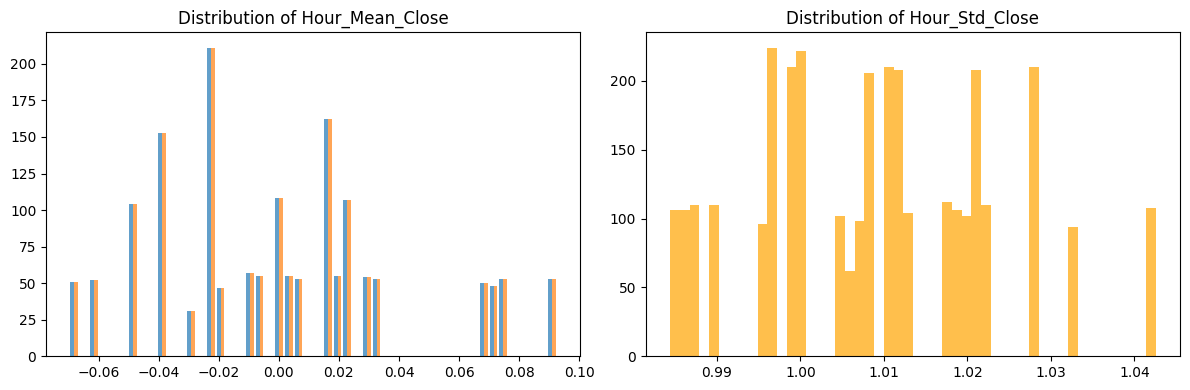

In [203]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the histogram for 'Hour_Mean_Close' on the first axis
ax[0].hist(Tesla['Hour_Mean_Close'].dropna(), bins=50, alpha=0.7, label='Hour_Mean_Close')
ax[0].set_title('Distribution of Hour_Mean_Close')

# Plotting the histogram for 'Hour_Std_Close' on the second axis
ax[1].hist(Tesla['Hour_Std_Close'].dropna().to_numpy().flatten(), bins=50, alpha=0.7, label='Hour_Std_Close', color='orange')
ax[1].set_title('Distribution of Hour_Std_Close')

# Display the plot
plt.tight_layout()
plt.show()
